# Multi-Modal LLM using Replicate LlaVa and Fuyu 8B model for image reasoning

In this notebook, we show how to use MultiModal LLM class (Llava and Fuyu 8B model from replicate) for image understanding/reasoning

**NOTE**: At the moment, the Replicate multi-modal LLMs only support one image document at a time.

In [ ]:
% pip install replicate

## Load and initialize LLava model

In [ ]:
import os

REPLICATE_API_TOKEN = ""  # Your Relicate API token here
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

In [ ]:
from PIL import Image
import requests
from io import BytesIO

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)
from llama_index.schema import ImageDocument


if not os.path.exists("test_images"):
    os.makedirs("test_images")

# for now fuyu-8b model on replicate can mostly handle JPG image urls well instead of local files
image_urls = [
    # "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]
# save images
for idx, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img.save(f"test_images/{idx}.png")

# option 1: load images from urls directly
# image_documents = load_image_urls(image_urls)
# option 2: load images from local
image_documents = [
    ImageDocument(image_path=f"test_images/{idx}.png")
    for idx in range(len(image_urls))
]

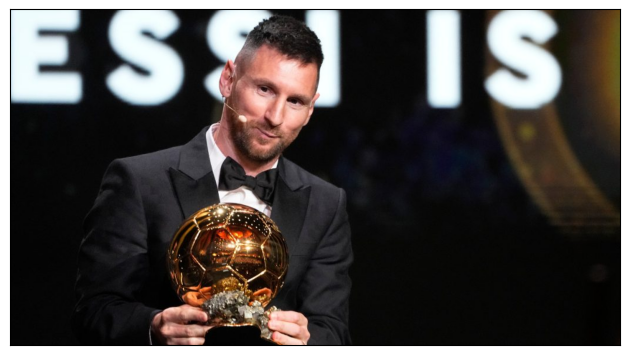

In [ ]:
import matplotlib.pyplot as plt

img = Image.open(open("test_images/0.png", "rb"))
plt.imshow(img)

plt.xticks([])
plt.yticks([])
plt.tight_layout()

In [ ]:
from llama_index.multi_modal_llms import ReplicateMultiModal

llava_multi_modal_llm = ReplicateMultiModal(
    model="yorickvp/llava-13b:2facb4a474a0462c15041b78b1ad70952ea46b5ec6ad29583c0b29dbd4249591",
    max_new_tokens=100,
    temperature=0.1,
    num_input_files=1,
)


llava_resp = llava_multi_modal_llm.complete(
    prompt="what is shown in this image?",
    image_documents=[image_documents[0]],
)

In [ ]:
print(llava_resp)

The image shows a man holding a trophy, which appears to be a gold soccer ball. He is dressed in a suit and tie, and he is smiling.


## Load and initialize Fuyu-8B model

In [ ]:
# for now fuyu-8b model on replicate can mostly handle JPG image urls well instead of local files
image_documents = load_image_urls(image_urls)

In [ ]:
fuyu_multi_modal_llm = ReplicateMultiModal(
    model="lucataco/fuyu-8b:42f23bc876570a46f5a90737086fbc4c3f79dd11753a28eaa39544dd391815e9",
    max_new_tokens=100,
    temperature=0.1,
    num_input_files=1,
)


fuyu_resp = fuyu_multi_modal_llm.complete(
    prompt="what is shown in this image?",
    image_documents=[image_documents[1]],
)

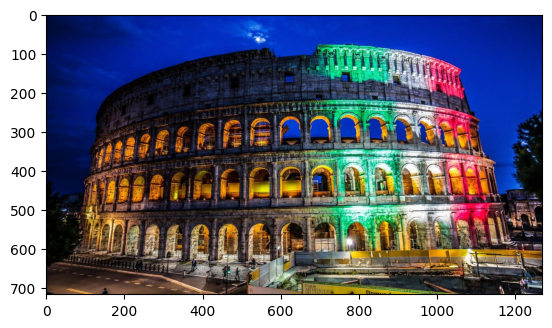

In [ ]:
response = requests.get(image_urls[1])
img = Image.open(BytesIO(response.content))
plt.imshow(img)

In [ ]:
# Show the image reasoining result from Fuyu 8B model
print(fuyu_resp)

 The image showcases a city street at night, with colorful lights illuminating the scene. The street is lined with buildings, including a prominent Roman-style amphitheater.
